In [20]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [94]:
# The path to our CSV files
csv_path_2011 = "../data/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv"
csv_path_2012 = "../data/Medicare_Provider_Charge_Inpatient_DRG100_FY2012.csv"
csv_path_2013 = "../data/Medicare_Provider_Charge_Inpatient_DRG100_FY2013.csv"
csv_path_2014 = "../data/Medicare_Provider_Charge_Inpatient_DRGALL_FY2014.csv"
csv_path_2015 = "../data/Medicare_Provider_Charge_Inpatient_DRGALL_FY2015.csv"

population_path = "../data/NST-EST2017-01.csv"
df_pop = pd.read_csv(population_path)

# Read our data into pandas
df_2011 = pd.read_csv(csv_path_2011)
df_2011['year'] = '2011'
df_2012 = pd.read_csv(csv_path_2012)
df_2012['year'] = '2012'
df_2013 = pd.read_csv(csv_path_2013)
df_2013['year'] = '2013'
df_2014 = pd.read_csv(csv_path_2014)
df_2014['year'] = '2014'
df_2015 = pd.read_csv(csv_path_2015)
df_2015['year'] = '2015'

df = pd.concat([df_2011,df_2012,df_2013,df_2014,df_2015])

In [95]:
df_pop

,State,USPS,2010,2011,2012,2013,2014,2015,2016,2017,Division,Region
0,Alabama,AL,"4,785,579","4,798,649","4,813,946","4,827,660","4,840,037","4,850,858","4,860,545","4,874,747",East South Central Division,South Region
1,Alaska,AK,"714,015","722,259","730,825","736,760","736,759","737,979","741,522","739,795",Pacific Division,West Region
2,Arizona,AZ,"6,407,002","6,465,488","6,544,211","6,616,124","6,706,435","6,802,262","6,908,642","7,016,270",Mountain Division,West Region
3,Arkansas,AR,"2,921,737","2,938,640","2,949,208","2,956,780","2,964,800","2,975,626","2,988,231","3,004,279",West South Central Division,South Region
4,California,CA,"37,327,690","37,672,654","38,019,006","38,347,383","38,701,278","39,032,444","39,296,476","39,536,653",Pacific Division,West Region
5,Colorado,CO,"5,048,029","5,116,411","5,186,330","5,262,556","5,342,311","5,440,445","5,530,105","5,607,154",Mountain Division,West Region
6,Connecticut,CT,"3,580,171","3,591,927","3,597,705","3,602,470","3,600,188","3,593,862","3,587,685","3,588,184",New England Division,Northeast Region
7,Delaware,DE,"899,712","907,884","916,868","925,114","934,805","944,107","952,698","961,939",South Atlantic Division,South Region
8,District of Columbia,DC,"605,040","620,336","635,630","650,114","660,797","672,736","684,336","693,972",South Atlantic Division,South Region
9,Florida,FL,"18,846,461","19,097,369","19,341,327","19,584,927","19,897,747","20,268,567","20,656,589","20,984,400",South Atlantic Division,South Region


In [23]:
# just to show original DRGs
drg_titles = set(df['DRG Definition'].unique())
print(len(drg_titles),drg_titles)

598 {'246 - PERC CARDIOVASC PROC W DRUG-ELUTING STENT W MCC OR 4+ VESSELS/STENTS', '916 - ALLERGIC REACTIONS W/O MCC', '186 - PLEURAL EFFUSION W MCC', '856 - POSTOPERATIVE OR POST-TRAUMATIC INFECTIONS W O.R. PROC W MCC', '033 - VENTRICULAR SHUNT PROCEDURES W/O CC/MCC', '329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC', '747 - VAGINA, CERVIX & VULVA PROCEDURES W/O CC/MCC', '464 - WND DEBRID & SKN GRFT EXC HAND, FOR MUSCULO-CONN TISS DIS W CC', '339 - APPENDECTOMY W COMPLICATED PRINCIPAL DIAG W CC', '183 - MAJOR CHEST TRAUMA W MCC', '511 - SHOULDER,ELBOW OR FOREARM PROC,EXC MAJOR JOINT PROC W CC', '582 - MASTECTOMY FOR MALIGNANCY W CC/MCC', '917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC', '625 - THYROID, PARATHYROID & THYROGLOSSAL PROCEDURES W MCC', '218 - CARDIAC VALVE & OTH MAJ CARDIOTHORACIC PROC W CARD CATH W/O CC/MCC', '394 - OTHER DIGESTIVE SYSTEM DIAGNOSES W CC', '683 - RENAL FAILURE W CC', '755 - MALIGNANCY, FEMALE REPRODUCTIVE SYSTEM W CC', '656 - KIDNEY & URETER PROCEDURES FO

In [24]:
#cleaning DRG titles to create 'mod_DRG Definition' series
patterns= [' W/O CC/MCC',' W/O MCC',' W MCC', ' W CC', ' MCC', '/MCC']
df['step1_mod_DRG Definition'] = df['DRG Definition'].replace(patterns, "", regex=True)
# knock off 'xxx - ', always 3 digits + ' - '
df['mod_DRG Definition'] = df['step1_mod_DRG Definition'].apply(lambda x : x[6:])

#
df.drop(df['step1_mod_DRG Definition'])

In [25]:
print(len(df['mod_DRG Definition'].unique()),df['mod_DRG Definition'].unique())

309 ['EXTRACRANIAL PROCEDURES' 'DEGENERATIVE NERVOUS SYSTEM DISORDERS'
 'INTRACRANIAL HEMORRHAGE OR CEREBRAL INFARCTION' 'TRANSIENT ISCHEMIA'
 'CRANIAL & PERIPHERAL NERVE DISORDERS' 'SEIZURES' 'DYSEQUILIBRIUM'
 'PULMONARY EMBOLISM' 'RESPIRATORY INFECTIONS & INFLAMMATIONS'
 'PULMONARY EDEMA & RESPIRATORY FAILURE'
 'CHRONIC OBSTRUCTIVE PULMONARY DISEASE' 'SIMPLE PNEUMONIA & PLEURISY'
 'BRONCHITIS & ASTHMA'
 'RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS'
 'RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT <96 HOURS'
 'MAJOR CARDIOVASC PROCEDURES' 'PERMANENT CARDIAC PACEMAKER IMPLANT'
 'PERC CARDIOVASC PROC W DRUG-ELUTING STENT OR 4+ VESSELS/STENTS'
 'PERC CARDIOVASC PROC W DRUG-ELUTING STENT'
 'PERC CARDIOVASC PROC W NON-DRUG-ELUTING STENT'
 'PERC CARDIOVASC PROC W/O CORONARY ARTERY STENT'
 'OTHER VASCULAR PROCEDURES'
 'ACUTE MYOCARDIAL INFARCTION, DISCHARGED ALIVE'
 'CIRCULATORY DISORDERS EXCEPT AMI, W CARD CATH' 'HEART FAILURE & SHOCK'
 'PERIPHERAL VASCULAR DISORDERS' 'AT

In [27]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,year,step1_mod_DRG Definition,mod_DRG Definition
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,5777.241758,4763.736264,2011,039 - EXTRACRANIAL PROCEDURES,EXTRACRANIAL PROCEDURES
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,5787.571429,4976.714286,2011,039 - EXTRACRANIAL PROCEDURES,EXTRACRANIAL PROCEDURES
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,5434.958333,4453.791667,2011,039 - EXTRACRANIAL PROCEDURES,EXTRACRANIAL PROCEDURES
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,5417.560000,4129.160000,2011,039 - EXTRACRANIAL PROCEDURES,EXTRACRANIAL PROCEDURES
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,5658.333333,4851.444444,2011,039 - EXTRACRANIAL PROCEDURES,EXTRACRANIAL PROCEDURES


In [92]:
# df.to_csv('../data/data.csv')

drgs = df.groupby(['mod_DRG Definition','Provider State'])
drgs['Provider State'].count()
plt.plot()
# .sort_values()
# list(drgs['Provider State'])
# per_state = drgs.sort_values(df['Total Discharges'])

# per_state['mod_DRG Definition'].head(50)
# 'Total Discharges', ['Provider State'].head()

mod_DRG Definition                                         Provider State
ACUTE & SUBACUTE ENDOCARDITIS                              FL                 1
                                                           NY                 1
ACUTE ADJUSTMENT REACTION & PSYCHOSOCIAL DYSFUNCTION       AL                 6
                                                           AR                 1
                                                           CA                 5
                                                           CO                 2
                                                           CT                 2
                                                           DE                 2
                                                           FL                16
                                                           GA                 1
                                                           IL                 3
                                              

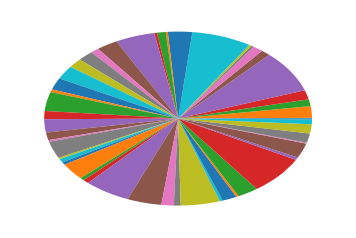

In [39]:
plt.pie(drgs);